In [1]:
import numpy as np
import pickle
import pandas as pd
import re
from tqdm import tqdm

In [2]:
with open('user2Vis.pkl','rb') as f:
	user2Vis=pickle.load(f)
with open('configAll.pkl','rb') as f:
	configAll=pickle.load(f)
with open('user2AttrAll.pkl','rb') as f:
	user2AttrAll=pickle.load(f)
with open('attr2vec.pkl','rb') as f:
	attr2vec=pickle.load(f)
with open('userLikeATTR.pkl','rb') as f:
	userLikeATTR=pickle.load(f)
with open('userLikeCFG.pkl','rb') as f:
	userLikeCFG=pickle.load(f)

In [3]:
configAll

['surface',
 'scatter3d',
 'bar',
 'histogram2dcontour',
 'mesh3d',
 'box',
 'scatter',
 'heatmap',
 'contour',
 'timeseries',
 'scattergl']

In [4]:
n_cfg=len(configAll)
t=0
repeat=1
n_rounds=200
comb_ratio_list=[]
reward_ratio_list=[]
false_ratio_list=[]
for user,visList in user2Vis.items():
	if user in user2AttrAll.keys():
		attrList=user2AttrAll[user]
		if len(attrList)<20:
			arms = attrList
			# print(attrList)
			n_arms=len(arms)
			rewards=np.zeros((n_cfg,n_arms,n_arms))
			CFG_reward=np.zeros(n_cfg)
			ATTR_reward=np.zeros((n_arms,n_arms))
			for c in range(n_cfg):
				for i in range(n_arms):
					for j in range(n_arms):						
						if ((arms[i],arms[j],configAll[c]) in visList):
							rewards[c][i][j]=1	
			comb_num=len(userLikeCFG[user])*(len(userLikeATTR[user])**2)
			reward_num=np.sum(rewards)
			all_num=n_cfg*len(attrList)**2
			comb_ratio_list.append(comb_num/all_num)
			reward_ratio_list.append(reward_num/all_num)
			false_ratio_list.append((comb_num-reward_num)/comb_num)
print(np.mean(np.array(comb_ratio_list)))
print(np.mean(np.array(reward_ratio_list)))
print(np.mean(np.array(false_ratio_list)))

0.04135224347314195
0.007981728568465147
0.7829537826953553


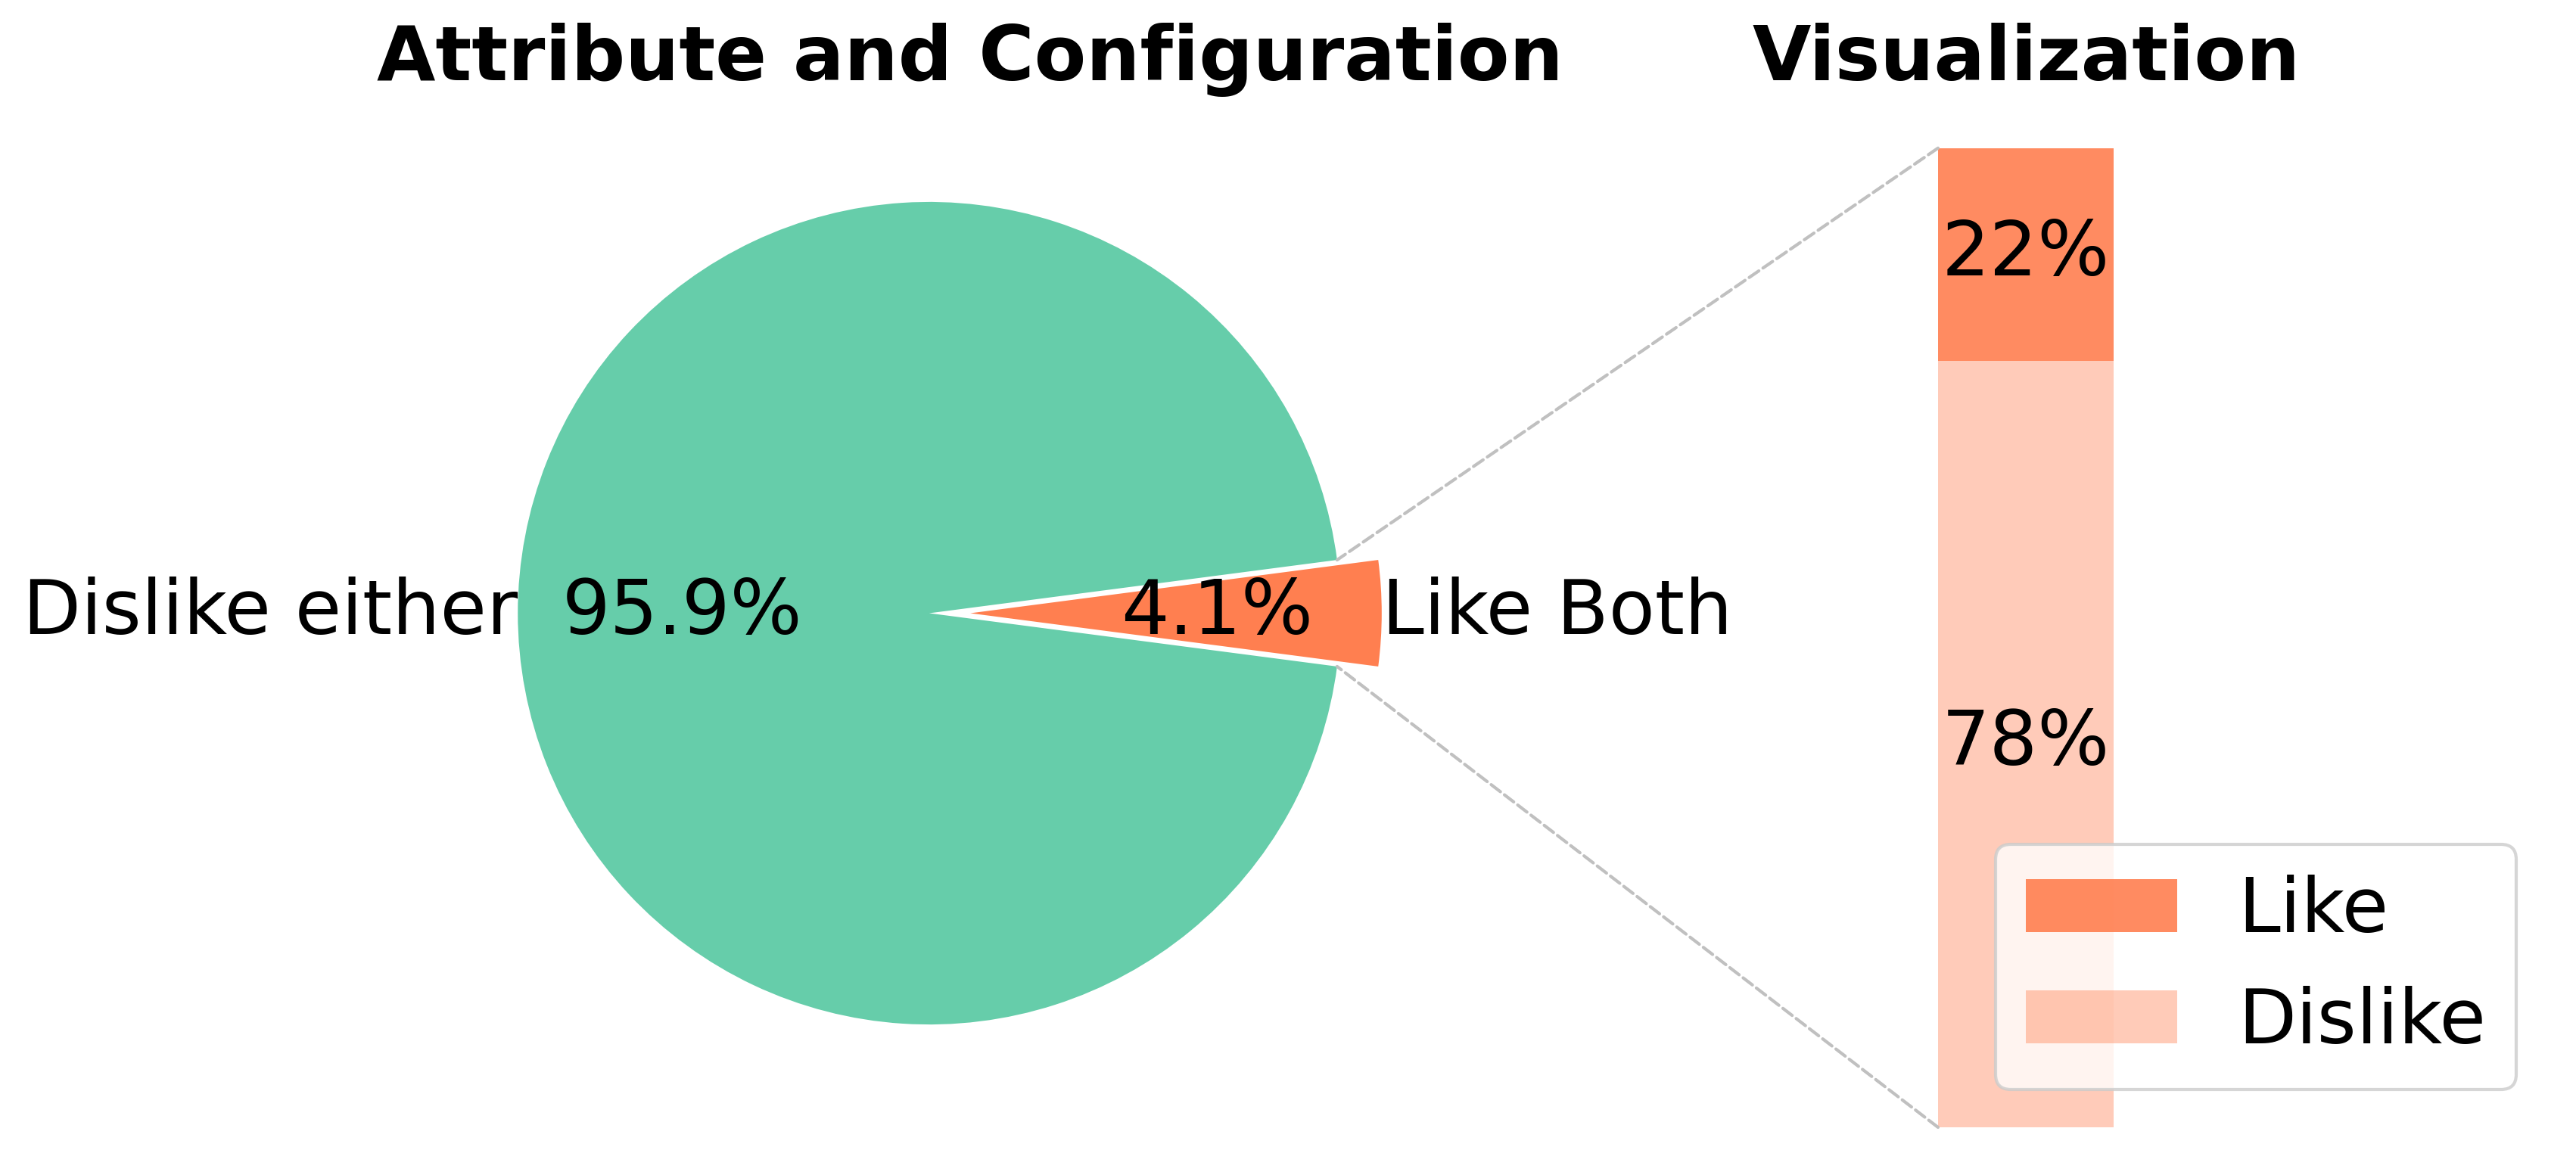

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),dpi=300)
fig.subplots_adjust(wspace=0)
# pie chart parameters
overall_ratios = [1-0.04135224347314195, 0.04135224347314195]
labels = ['Dislike either','Like Both']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0] +180
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle, labels=labels,labeldistance=1, explode=explode,colors=['mediumaquamarine','coral'], textprops={'fontsize': 24})
ax1.set_title('Attribute and Configuration',fontsize=24,fontweight='bold')
# bar chart parameters
age_ratios = [0.7829537826953553,1-0.7829537826953553]
age_labels = ['Dislike', 'Like']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='coral', label=label, alpha=0.9 - 0.5 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center',fontsize=24)

ax2.set_title('Visualization',fontsize=24,fontweight='bold')
# ax2.set_label(['Dislike','Like'])
ax2.legend(loc='lower right',fontsize=24)
ax2.axis('off')
ax2.set_xlim(- 3 * width, 3 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('silver')
con.set_linestyle('--')
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,xyB=(x, y), coordsB=ax1.transData)
con.set_color('silver')
con.set_linestyle('--')
con.set_linewidth(1)
ax2.add_artist(con)


plt.savefig('bar.pdf')

In [6]:
attrlen=[]
for user,visList in user2Vis.items():
	if user in user2AttrAll.keys():
		attrlen.append(len(user2AttrAll[user]))
len(attrlen)

831

In [12]:
with open('user2Vis_1k.pkl','rb') as f:
	user2Vis_1k=pickle.load(f)
with open('user2AttrAll_1k.pkl','rb') as f:
	user2AttrAll_1k=pickle.load(f)
attrlen_1k=[]
for user,visList in user2Vis_1k.items():
	if user in user2AttrAll_1k.keys():
		attrlen_1k.append(len(user2AttrAll_1k[user]))
len(attrlen_1k)

614

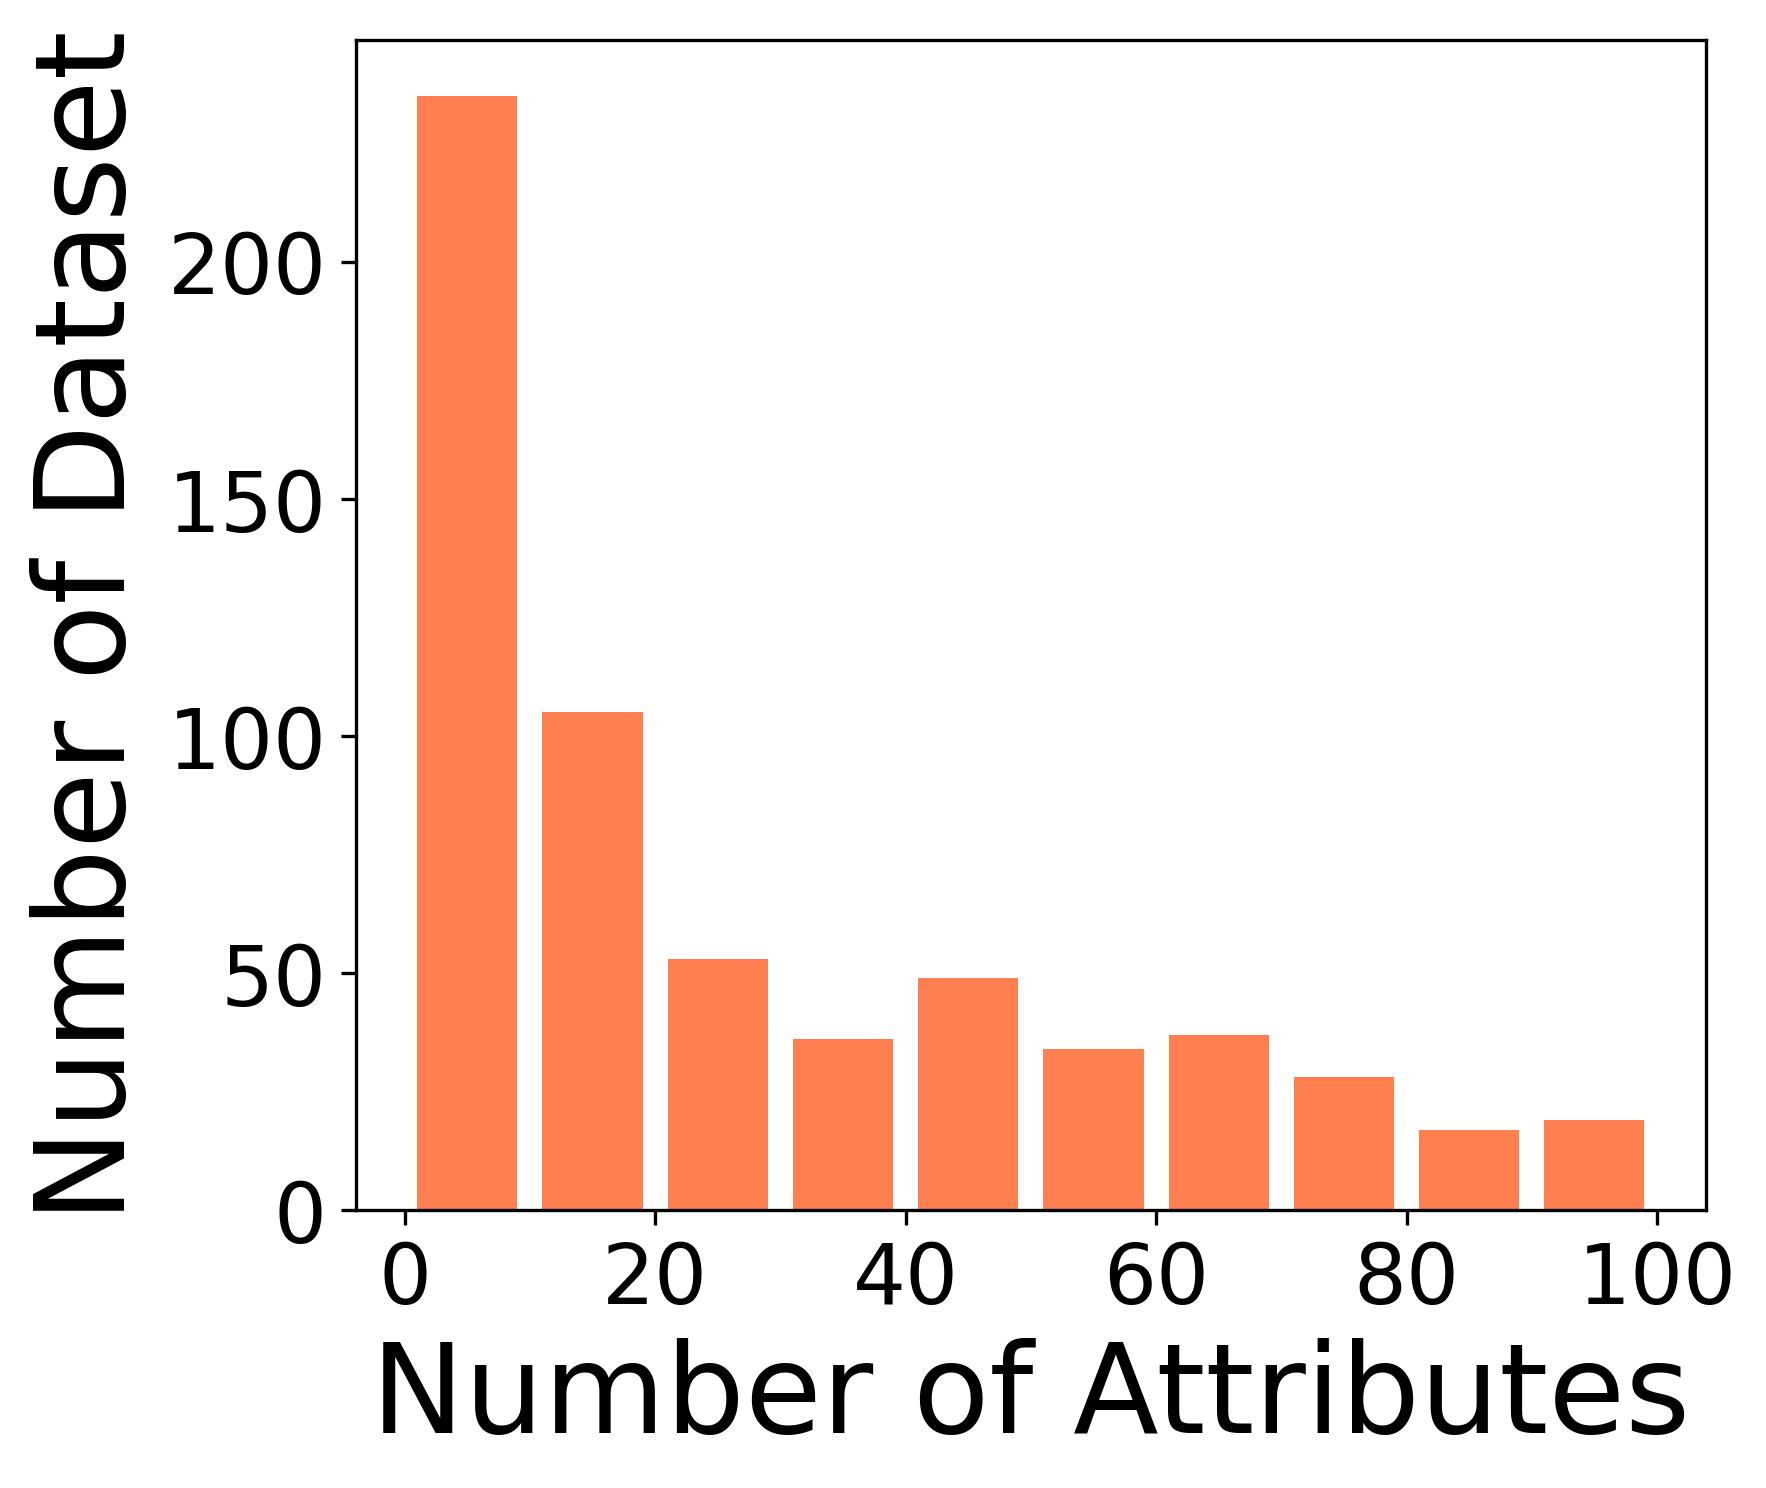

In [17]:
plt.figure(figsize=(6,5),dpi=300)
plt.subplots_adjust(left=0.2,right=0.95,bottom=0.2,top=0.98)
plt.hist(attrlen,bins=10,range=[0,100],color='coral',rwidth=0.8)
# plt.title('Distribution of Attribute Numbers\nin the Plot.ly Dataset',fontweight='bold',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Attributes',fontsize=30)
plt.ylabel('Number of Dataset',fontsize=30)
plt.savefig('hist.pdf')

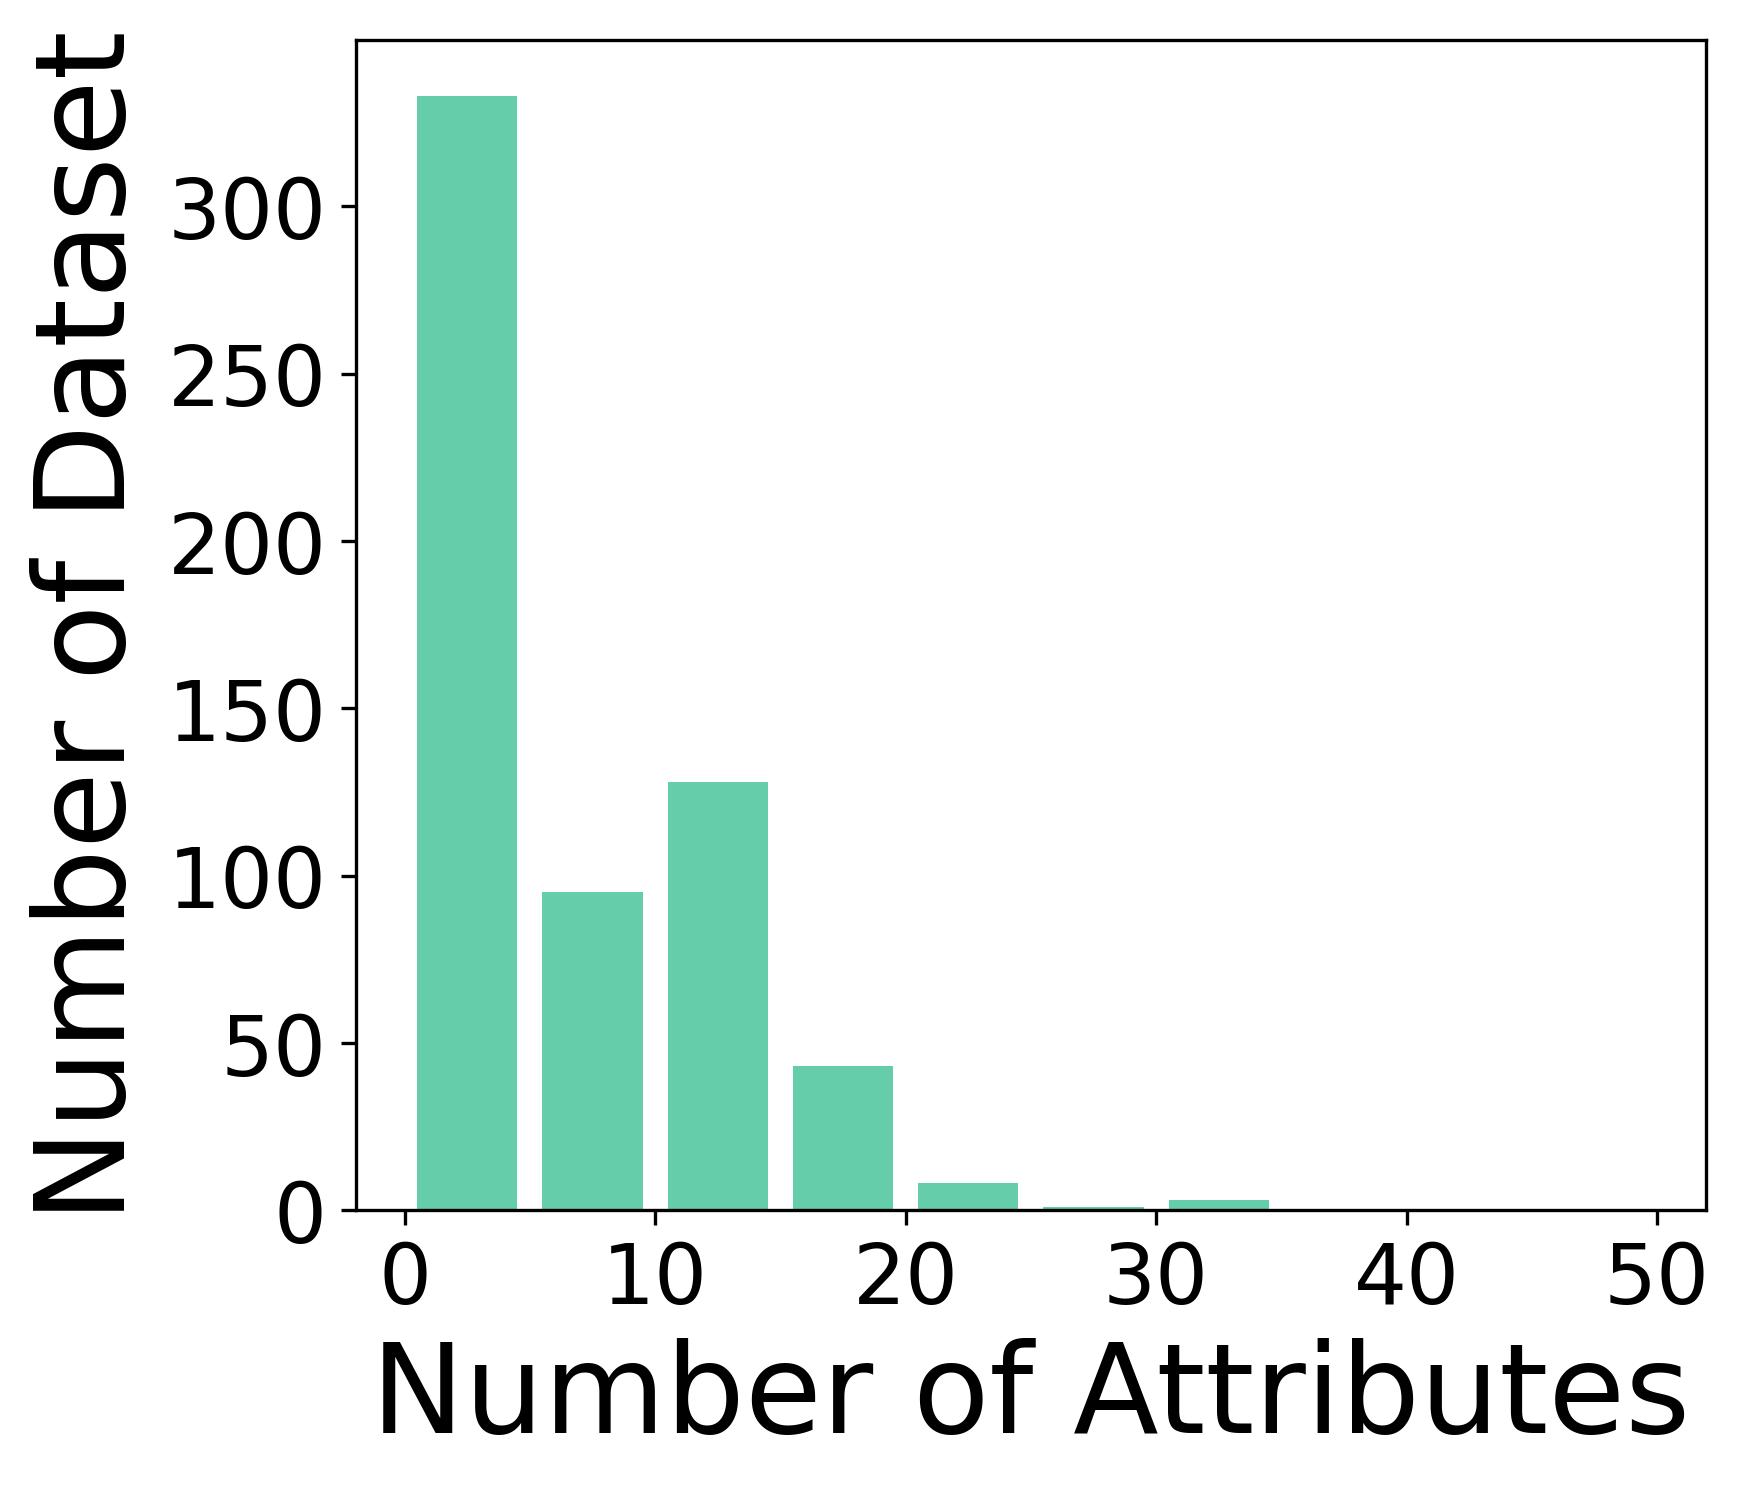

In [19]:

plt.figure(figsize=(6,5),dpi=300)
plt.subplots_adjust(left=0.2,right=0.95,bottom=0.2,top=0.98)
plt.hist(attrlen_1k,bins=10,range=[0,50],color='mediumaquamarine',rwidth=0.8)
# plt.title('Distribution of Attribute Numbers\nin the Plot.ly Dataset',fontweight='bold',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Attributes',fontsize=30)
plt.ylabel('Number of Dataset',fontsize=30)
plt.savefig('hist_1k.pdf')

In [2]:
with open('arrName2vec.pkl','rb') as f:
	f1=pickle.load(f)

In [5]:
from collections import defaultdict
with open('username_variable_mapping_list.pkl','rb') as f:
	f2=pickle.load(f)
user2Attr=defaultdict(list)
for uid, attr in f2:
	temp=re.split('.csv_',attr)
	tempAttr=temp[0]+':'+temp[1]
	user2Attr[uid].append(tempAttr)
#change '.cxv_' to : there
user2Attr=dict(user2Attr)
user2Attr
#isha.tasfia:5:65cc21	

{'013Konstantin': ['013Konstantin:0:698e36',
  '013Konstantin:0:ca6ff4',
  '013Konstantin:0:898d6e',
  '013Konstantin:0:1b5598'],
 '0160513': ['0160513:2:db2ca8',
  '0160513:2:d9bbd5',
  '0160513:4:f84f13',
  '0160513:4:15b7d5'],
 '01jatinsharma01': ['01jatinsharma01:64:1de62b',
  '01jatinsharma01:64:45f006',
  '01jatinsharma01:66:5ca674',
  '01jatinsharma01:66:d27f50',
  '01jatinsharma01:68:654806',
  '01jatinsharma01:68:4e635a'],
 '021704': ['021704:0:25fb1b',
  '021704:0:817104',
  '021704:0:199b6f',
  '021704:0:bd02d6'],
 '022589': ['022589:26:f40e27', '022589:26:f75896', '022589:26:70c929'],
 '0311thdud': ['0311thdud:0:MOBUM9RLC9F6R62NO1CF5MCAJ37C19PI',
  '0311thdud:0:TPDSI5YBR4P7JX0N8EJ2J8P17NPW2S54',
  '0311thdud:0:AZVXVT5PN7A2E118JQLGZU59LP1EHJFR',
  '0311thdud:0:8MLZLXW97RR5BIZNC1R6PNDW7OA958RB'],
 '034699': ['034699:0:d59653',
  '034699:0:55325e',
  '034699:1:0b01e0',
  '034699:1:aab61e',
  '034699:4:1af74b',
  '034699:4:1bc7c8'],
 '04170124': ['04170124:1:7c4b17',
  '0417012

In [10]:
with open('arrName2vec.pkl','rb') as f:
	arrName2vec=pickle.load(f)
attr2Vec={}
for attr,vec in arrName2vec.items():
	temp=re.split('.csv_',attr)
	tempAttr=temp[0]+':'+temp[1]
	attr2Vec[tempAttr]=vec
attr2Vec



{'pwellner:3:166112': array([ 1.57737662e-05, -2.17539403e-04, -4.70657580e-04, -2.87533754e-04,
         7.77744178e-04, -9.51722495e-05,  2.55485824e-05,  1.91876692e-04,
        -8.82939553e-04,  1.25311925e-03]),
 'pwellner:3:9fed88': array([ 1.66395338e-05, -2.17033070e-04, -3.27808375e-04, -2.71265214e-04,
         8.16763894e-04, -9.52973043e-05,  2.48109567e-05,  2.25109763e-04,
        -8.79694356e-04,  1.18693878e-03]),
 'pwellner:3:64667f': array([ 9.94805077e-06, -1.55071220e-04, -2.00900489e-04, -3.14758105e-04,
         7.59898444e-04, -9.34009558e-05,  2.14733667e-05,  2.46695977e-04,
        -7.52692030e-04,  1.24633541e-03]),
 'lcolumelli:50:cd008e': array([-8.35605169e-06,  1.37488372e-04, -1.76094570e-04,  1.60468450e-04,
         9.06991850e-04, -1.20069670e-05,  3.75188943e-06,  4.78777291e-04,
        -7.38877043e-04,  1.11397751e-03]),
 'lcolumelli:50:a896db': array([ 6.10275841e-05, -6.25504570e-04, -3.67056663e-04, -1.08463609e-03,
        -2.29244783e-04, -8.0

In [11]:
with open('attr2Vec.pkl','wb') as f:
	pickle.dump(attr2Vec,f)

In [8]:
with open('user2AttrAll.pkl','wb') as f:
	pickle.dump(user2Attr,f)

In [12]:
with open('user2Vis.pkl','rb') as f:
	user2Vis=pickle.load(f)
user2Vis

{'034699': [('034699:4:1af74b', '034699:4:1bc7c8', 'scatter')],
 '09511516': [('09511516:30:b6972e', '09511516:30:22f48b', 'scatter'),
  ('09511516:30:7a2cd9', '09511516:30:6aa950', 'scatter'),
  ('09511516:30:e76e54', '09511516:30:5da4ce', 'scatter'),
  ('09511516:30:3082e0', '09511516:30:bf2cb2', 'scatter')],
 '18greeneethan': [('18greeneethan:47:4316d4',
   '18greeneethan:47:5da3a3',
   'scatter')],
 '19ashields': [('19ashields:0:d5d7bd', '19ashields:0:4106ed', 'scatter')],
 '19dybe': [('19dybe:4:917606', '19dybe:4:a4b13d', 'scatter')],
 '204754': [('204754:2:ef5b2f', '204754:2:b5b095', 'scatter')],
 '204800': [('204800:2:ae5c2d', '204800:2:7e3603', 'scatter')],
 '22agammell': [('22agammell:4:649778', '22agammell:4:4f6a8b', 'bar')],
 '32951': [('32951:7:6835c8', '32951:7:4c5580', 'scatter'),
  ('32951:3:2c84fa', '32951:3:e8928b', 'scatter')],
 '5005p': [('5005p:20:144840', '5005p:20:393d09', 'scatter'),
  ('5005p:20:1617eb', '5005p:20:f4eb10', 'scatter')],
 '534443': [('534443:0:290

In [14]:
userLikeATTR={}
userLikeCFG={}
for user, vislist in user2Vis.items():
	LikeATTR=[]
	LikeCFG=[]
	for vis in vislist:
		LikeATTR.append(vis[0])
		LikeATTR.append(vis[1])
		LikeCFG.append(vis[2])
	userLikeATTR[user]=list(set(LikeATTR))
	userLikeCFG[user]=list(set(LikeCFG))

{'034699': ['scatter'],
 '09511516': ['scatter'],
 '18greeneethan': ['scatter'],
 '19ashields': ['scatter'],
 '19dybe': ['scatter'],
 '204754': ['scatter'],
 '204800': ['scatter'],
 '22agammell': ['bar'],
 '32951': ['scatter'],
 '5005p': ['scatter'],
 '534443': ['bar'],
 '534665': ['bar'],
 '540061': ['bar'],
 '803702': ['scatter'],
 '8303725147': ['scatter'],
 'ARydinski': ['bar'],
 'Aagam_PivotChain': ['scatter'],
 'AbdelhakimBendjabeur26ae': ['scatter'],
 'AdamKulidjian': ['scatter', 'bar', 'contour'],
 'Akash_0.5': ['bar'],
 'AleksanderLidtke': ['scatter'],
 'Anderskjaer': ['heatmap'],
 'AndrewChegwidden': ['scatter'],
 'AngelinaLi': ['bar'],
 'AnnaGolebiowska': ['scatter'],
 'AnuragChowdhury': ['scatter'],
 'Anushaaa': ['scatter'],
 'ApoorvaBairathi': ['scatter'],
 'ArrowsX': ['scatter'],
 'Bambuszka': ['scatter'],
 'BehnamAshtarayeh': ['bar'],
 'Bingyingshao': ['scatter'],
 'BoBeni': ['scatter'],
 'BoonP': ['scatter', 'bar'],
 'BorisFor317': ['bar'],
 'BrajeshLodhi': ['scatter'],

In [ ]:
with open('userLikeATTR.pkl','wb') as f:
	pickle.dump(userLikeATTR,f)
with open('userLikeCFG.pkl','wb') as f:
	pickle.dump(userLikeCFG,f)